In [32]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

In [74]:

iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()
digits = datasets.load_digits()
wine_quality = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

data_list = [iris, wine, breast_cancer, digits, wine_quality]
data_names = ['iris', 'wine', 'breast_cancer', 'digits', 'wine_quality']

data_list_unsupervised = [iris, wine, breast_cancer, digits, wine_quality]
data_names_unsupervised = ['iris', 'wine', 'breast_cancer', 'digits', 'wine_quality']


* Random Forest Classifier 

In [58]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

avrege_accuracy = 0
i = 0
for data in data_list:
    if data_names[i] == 'wine_quality':
        X = data.drop('quality', axis=1)
        y = data['quality']
    else:
        X = data.data
        y = data.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier and get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')
    
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

    print(" ")
    i=i+1
    avrege_accuracy = avrege_accuracy + accuracy
    
print(f'Average accuracy: {avrege_accuracy/data_list.__len__():.2f}')


Dataset: iris
Accuracy: 0.90
Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.97
 
Dataset: wine
Accuracy: 1.00
Cross-validation scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mean cross-validation score: 0.97
 
Dataset: breast_cancer
Accuracy: 0.96
Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean cross-validation score: 0.96
 
Dataset: digits
Accuracy: 0.96
Cross-validation scores: [0.93055556 0.91111111 0.95821727 0.96935933 0.9275766 ]
Mean cross-validation score: 0.94
 
Dataset: wine_quality
Accuracy: 0.68
Cross-validation scores: [0.515625  0.5625    0.603125  0.5625    0.5862069]
Mean cross-validation score: 0.57
 
Average accuracy: 0.90


* SVC Classifier

In [59]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

avrege_accuracy = 0
i = 0
for data in data_list:
    if data_names[i] == 'wine_quality':
        X = data.drop('quality', axis=1)
        y = data['quality']
    else:
        X = data.data
        y = data.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Perform necessary preprocessing (standardization)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Support Vector Machine classifier
    classifier = SVC(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean():.2f}')
    print(" ")
    
    avrege_accuracy = avrege_accuracy + accuracy
    i = i + 1
    
print(f'Average accuracy: {avrege_accuracy/data_list.__len__():.2f}')

Dataset: iris
Accuracy: 0.97
Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean cross-validation score: 0.97
 
Dataset: wine
Accuracy: 0.97
Cross-validation scores: [0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
Mean cross-validation score: 0.66
 
Dataset: breast_cancer
Accuracy: 0.98
Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean cross-validation score: 0.91
 
Dataset: digits
Accuracy: 0.97
Cross-validation scores: [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
Mean cross-validation score: 0.96
 
Dataset: wine_quality
Accuracy: 0.62
Cross-validation scores: [0.56875    0.534375   0.475      0.45625    0.47648903]
Mean cross-validation score: 0.50
 
Average accuracy: 0.90


Dataset: iris
Adjusted Rand Index: 0.72
Normalized Mutual Information: 0.74
Silhouette Score: 0.55
 


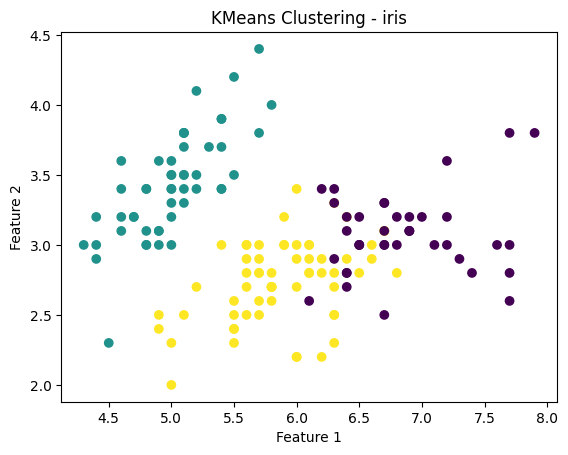

Dataset: wine
Adjusted Rand Index: 0.35
Normalized Mutual Information: 0.42
Silhouette Score: 0.56
 


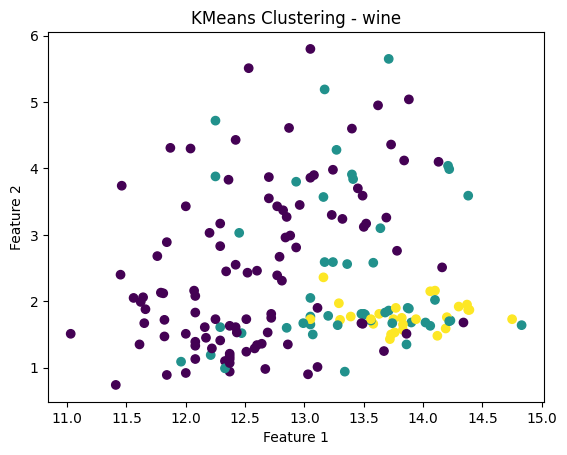

Dataset: breast_cancer
Adjusted Rand Index: 0.49
Normalized Mutual Information: 0.46
Silhouette Score: 0.70
 


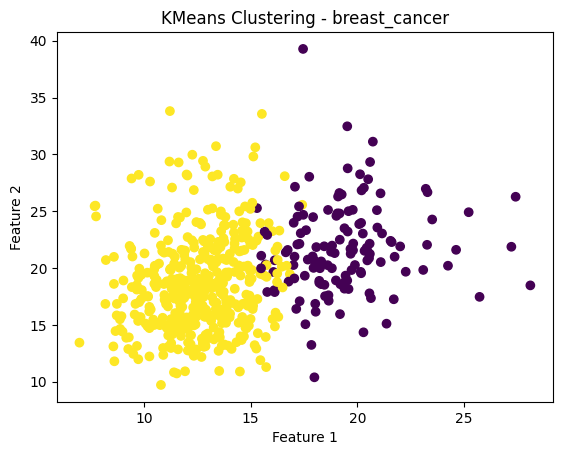

Dataset: digits
Adjusted Rand Index: 0.73
Normalized Mutual Information: 0.77
Silhouette Score: 0.18
 


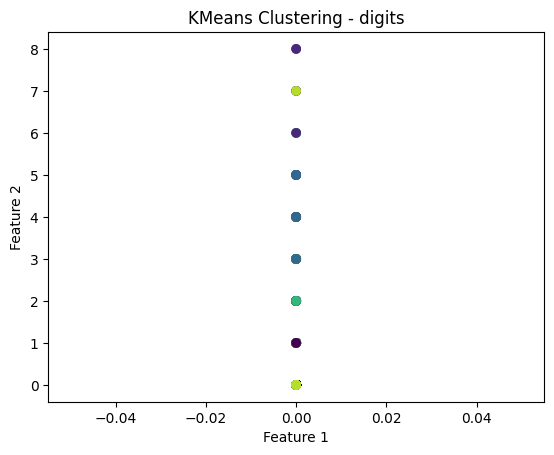

Dataset: wine_quality
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.04
Silhouette Score: 0.40
 


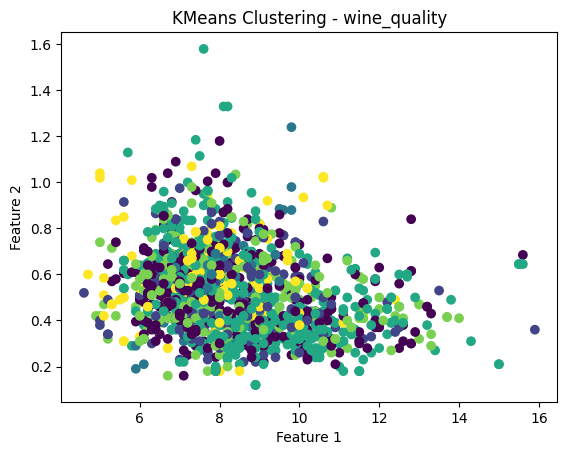

In [77]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Iterate over the datasets
for i, data in enumerate(data_list_unsupervised):
    if data_names_unsupervised[i] == 'wine_quality':
        X = data.drop('quality', axis=1).values
        y_true = data['quality'].values
    else:
        X = data.data
        y_true = data.target

    # Perform KMeans clustering
    n_clusters = len(np.unique(y_true))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Evaluate the clustering
    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    silhouette = silhouette_score(X, labels)

    print(f'Dataset: {data_names_unsupervised[i]}')
    print(f'Adjusted Rand Index: {ari:.2f}')
    print(f'Normalized Mutual Information: {nmi:.2f}')
    print(f'Silhouette Score: {silhouette:.2f}')
    print(" ")

    # Plot the clusters (using the first two features for visualization)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KMeans Clustering - {data_names_unsupervised[i]}')
    plt.show()